<a href="https://colab.research.google.com/github/bakeunbi99/Colab/blob/main/Ch2.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/9_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/10/20 16:42
내용 : 결정트리 실습하기

  결정트리(랜덤 포레스트의 기반이 된다,)
  - 일련의 변수들을 활용하여 특정 카테고리로 분류 또는 예측 알고리즘

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
import pydotplus
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 불러오기
df_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 학습데이터
iris_train_data = df_iris.iloc[:, 0:4]
iris_train_label = df_iris.iloc[:, 4]

train_data, test_data, train_label, test_label = train_test_split(iris_train_data, iris_train_label)
train_data

,sepal.length,sepal.width,petal.length,petal.width
117,7.7,3.8,6.7,2.2
104,6.5,3.0,5.8,2.2
60,5.0,2.0,3.5,1.0
13,4.3,3.0,1.1,0.1
76,6.8,2.8,4.8,1.4
...,...,...,...,...
139,6.9,3.1,5.4,2.1
138,6.0,3.0,4.8,1.8
146,6.3,2.5,5.0,1.9
118,7.7,2.6,6.9,2.3


In [ ]:
# 학습하기
model = tree.DecisionTreeClassifier()  # 분류기
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 테스트하기
result = model.predict(test_data)

In [ ]:
# 성능평가
score = metrics.accuracy_score(result, test_label)
score

1.0

In [ ]:
# 모델 설명 확인
model_text = tree.export_text(model)
print(model_text)

|--- feature_2 <= 2.45
|   |--- class: Setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



[Text(334.8, 597.96, 'petal.length <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [36, 36, 40]\nclass = Virginica'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Setosa'),
 Text(386.3076923076923, 489.24, 'petal.width <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 36, 40]\nclass = Virginica'),
 Text(206.03076923076924, 380.52000000000004, 'petal.length <= 4.95\ngini = 0.219\nsamples = 40\nvalue = [0, 35, 5]\nclass = Versicolor'),
 Text(103.01538461538462, 271.8, 'petal.width <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Versicolor'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Versicolor'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(309.04615384615386, 271.8, 'petal.width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(257.53846153846155, 163.07999999999998, 'gi

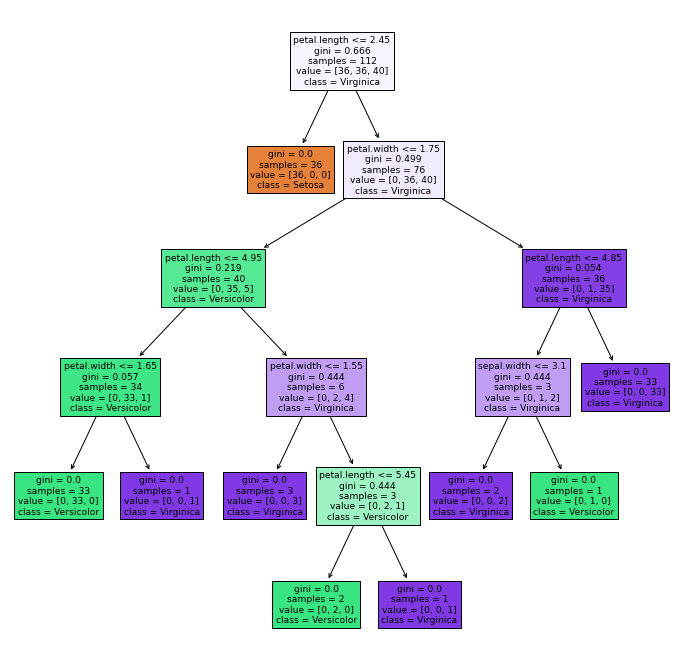

In [ ]:
# 모델 시각화
fig = plt.figure(figsize=(12, 12))
tree.plot_tree(model, 
               feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               filled=True)